# Предварительная обработка данных

1.	Загрузите и прочитайте в pandas следующий датасет: 
https://raw.githubusercontent.com/narendramall/Predicting_Price_of_Pre_Owned_Cars/master/cars_sampled.csv

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('cars_sampled.csv')

2.	Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать
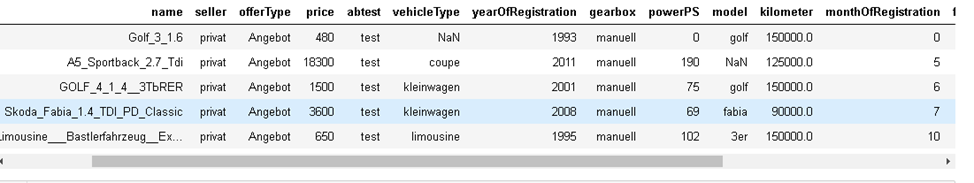

In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [4]:
data.insert(2, 'datecrawled',  data['dateCrawled'])
data = data.drop(columns='dateCrawled')
data.head()

,name,datecrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,Zu_verkaufen,30/03/2016 13:51,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,Volvo_XC90_2.4D_Summum,7/3/2016 9:54,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,Volkswagen_Touran,1/4/2016 0:57,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,Seat_Ibiza_1.4_16V_Reference,19/03/2016 17:50,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,16/03/2016 14:51,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


3.	Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [5]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [6]:
data.isna().sum()

name                      0
datecrawled               0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [7]:
data.shape

(50001, 19)

In [8]:
list(data['gearbox'].unique())

['manual', 'automatic', nan]

In [9]:
def get_column_info(): 
    for column in list(data.columns):
        print("Колонка - {} | Тип данных: {} | Уникальные значения: {}".format(column, data[column].dtype, len(list(data[column].unique())) ))

In [10]:
get_column_info()

Колонка - name | Тип данных: object | Уникальные значения: 38766
Колонка - datecrawled | Тип данных: object | Уникальные значения: 12039
Колонка - seller | Тип данных: object | Уникальные значения: 2
Колонка - offerType | Тип данных: object | Уникальные значения: 2
Колонка - price | Тип данных: int64 | Уникальные значения: 2393
Колонка - abtest | Тип данных: object | Уникальные значения: 2
Колонка - vehicleType | Тип данных: object | Уникальные значения: 9
Колонка - yearOfRegistration | Тип данных: int64 | Уникальные значения: 97
Колонка - gearbox | Тип данных: object | Уникальные значения: 3
Колонка - powerPS | Тип данных: int64 | Уникальные значения: 460
Колонка - model | Тип данных: object | Уникальные значения: 249
Колонка - kilometer | Тип данных: int64 | Уникальные значения: 13
Колонка - monthOfRegistration | Тип данных: int64 | Уникальные значения: 13
Колонка - fuelType | Тип данных: object | Уникальные значения: 8
Колонка - brand | Тип данных: object | Уникальные значения: 40
К

4.	Поработайте с типами переменных. Все числовые значения переведите в формат int.

In [11]:
data = data.astype({'price':int, 'yearOfRegistration':int, 'powerPS':int, 
             'kilometer':int, 'monthOfRegistration':int, 'postalCode':int})
data.dtypes

name                   object
datecrawled            object
seller                 object
offerType              object
price                   int32
abtest                 object
vehicleType            object
yearOfRegistration      int32
gearbox                object
powerPS                 int32
model                  object
kilometer               int32
monthOfRegistration     int32
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int32
lastSeen               object
dtype: object

5.	Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

<AxesSubplot:>

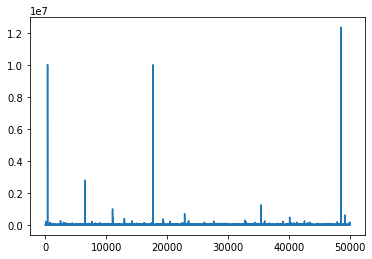

In [12]:
data.price.plot()

<AxesSubplot:ylabel='price'>

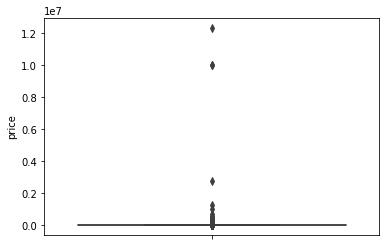

In [13]:
sns.boxplot(y='price',data=data)

In [14]:
import copy 
new_data = copy.deepcopy(data)

q75, q25 = np.percentile(data.price,[75,25])
intr_qr = q75-q25

loc_min = q25-(1.5*intr_qr)
loc_max = q75+(1.5*intr_qr)

new_data[data.price < loc_min] = np.nan
new_data[data.price > loc_max] = np.nan

In [15]:
new_data.price.isna().sum()

3757

<AxesSubplot:ylabel='price'>

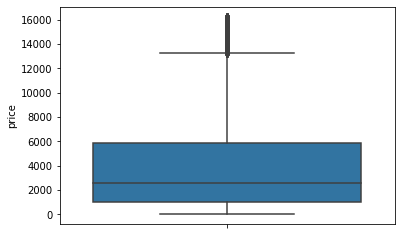

In [16]:
sns.boxplot(y=new_data.price)

<AxesSubplot:>

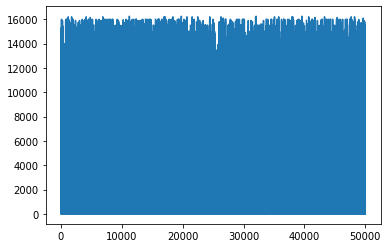

In [17]:
new_data.price.plot()

6.	Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

<AxesSubplot:>

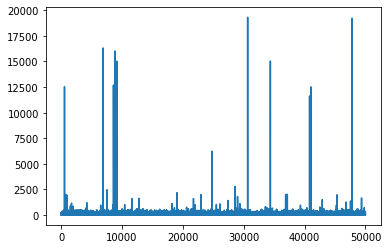

In [18]:
data.powerPS.plot()

<AxesSubplot:>

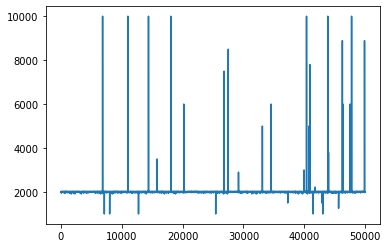

In [19]:
data.yearOfRegistration.plot()

In [20]:
numeric_col = ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']

for el in numeric_col[1:]:
    q75, q25 = np.percentile(data[el], [75,25])
    intr_qr = q75-q25

    loc_min = q25-(1.5*intr_qr)
    loc_max = q75+(1.5*intr_qr)

    new_data[data[el] < loc_min] = np.nan
    new_data[data[el] > loc_max] = np.nan

<AxesSubplot:>

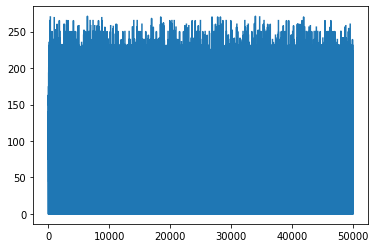

In [21]:
new_data.powerPS.plot()

<AxesSubplot:>

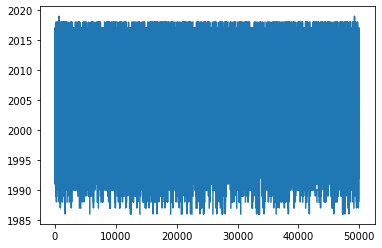

In [22]:
new_data.yearOfRegistration.plot()

<AxesSubplot:>

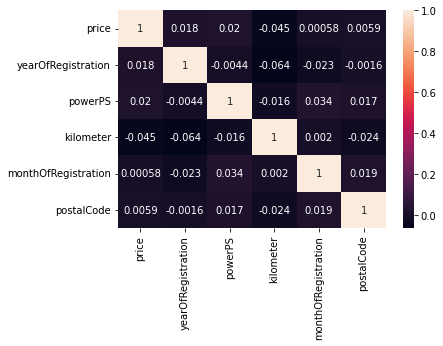

In [28]:
# До преобразования данных
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

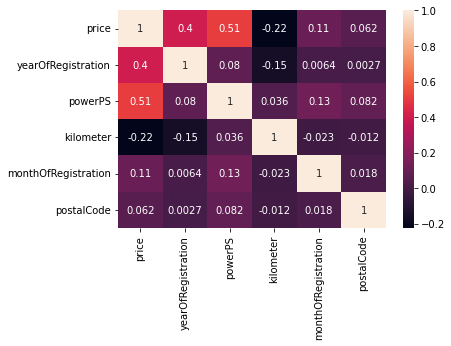

In [29]:
# После
corr_matrix = new_data.loc[:,numeric_col].corr()
sns.heatmap(corr_matrix, annot=True)

7.	Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

In [45]:
sns.set(rc={'figure.figsize':(7,5)})

<AxesSubplot:xlabel='gearbox', ylabel='price'>

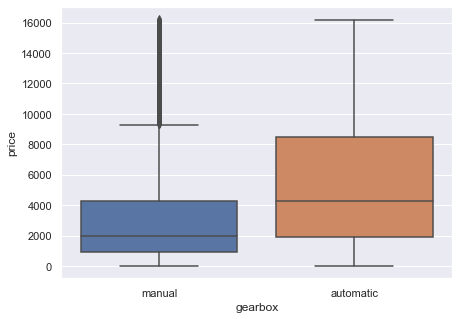

In [52]:
# Цена на машины с автоматом выше
sns.boxplot(x=new_data["gearbox"], y=new_data["price"])

<AxesSubplot:xlabel='fuelType', ylabel='price'>

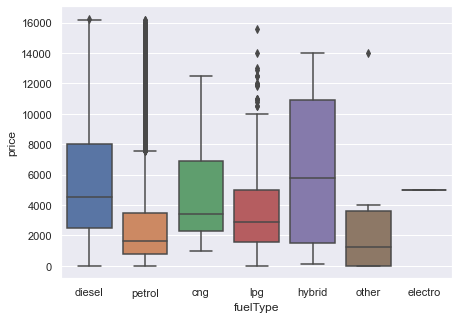

In [47]:
# Цены на гибриды больше остальных, дизель второй по цене
sns.boxplot(x=new_data["fuelType"], y=new_data["price"])

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

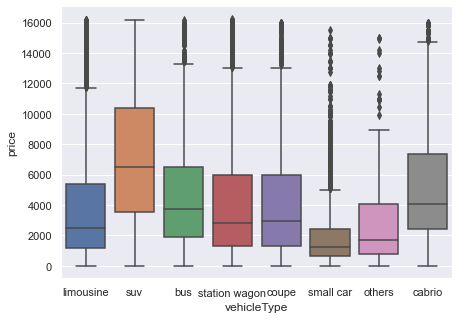

In [50]:
# Кроссоверы дороже всех, на втором месте кабриолеты
sns.boxplot(x=new_data["vehicleType"], y=new_data["price"])

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

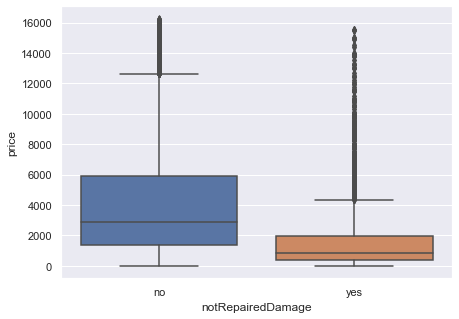

In [53]:
# Машины с неремонтируемыми повреждениями меньше стоят
sns.boxplot(x=new_data["notRepairedDamage"], y=new_data["price"])

8.	Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [60]:
new_data.shape

(50001, 19)

In [61]:
nan_values = new_data.isna().sum()
nan_values[nan_values > 0]

name                   11332
datecrawled            11332
seller                 11332
offerType              11332
price                  11332
abtest                 11332
vehicleType            15547
yearOfRegistration     11332
gearbox                13402
powerPS                11332
model                  13306
kilometer              11332
monthOfRegistration    11332
fuelType               14851
brand                  11332
notRepairedDamage      19391
dateCreated            11332
postalCode             11332
lastSeen               11332
dtype: int64

In [62]:
new_data = new_data.dropna(subset=["notRepairedDamage"])

In [65]:
new_data.shape

(30610, 19)

In [70]:
nan_values = new_data.isna().sum()
nan_values[nan_values > 0]

vehicleType    1958
gearbox         777
model          1081
fuelType       1773
dtype: int64

In [89]:
nan_values[nan_values > 0].to_dict()[pars[0]]

1958

['vehicleType', 'gearbox', 'model', 'fuelType']


<AxesSubplot:xlabel='fuelType', ylabel='count'>

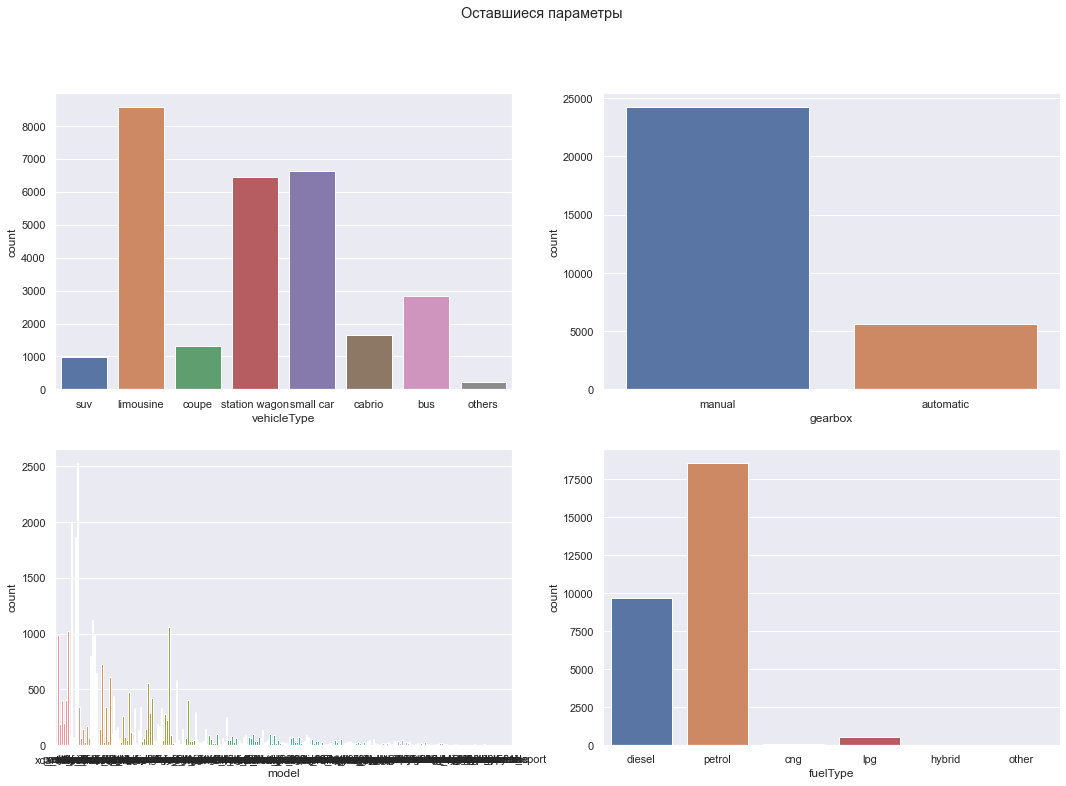

In [93]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Оставшиеся параметры')

pars = list(nan_values[nan_values > 0].to_dict().keys())
print(pars)

sns.countplot(ax=axes[0, 0], x=pars[0], data=new_data)
sns.countplot(ax=axes[0, 1], x=pars[1], data=new_data)
sns.countplot(ax=axes[1, 0], x=pars[2], data=new_data)
sns.countplot(ax=axes[1, 1], x=pars[3], data=new_data)

In [94]:
for column in ['vehicleType', 'gearbox', 'fuelType']:
    new_data[column] = new_data[column].fillna(new_data[column].value_counts().index[0])

In [95]:
nan_values = new_data.isna().sum()
nan_values[nan_values > 0]

model    1081
dtype: int64

In [96]:
final_data = copy.deepcopy(new_data)

final_data = final_data.dropna()
final_data.shape

(29529, 19)

9.	Сохраните полученный датасет и выведете его.

In [97]:
final_data.head()

,name,datecrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,Volvo_XC90_2.4D_Summum,7/3/2016 9:54,private,offer,13299.0,control,suv,2005.0,manual,163.0,xc_reihe,150000.0,6.0,diesel,volvo,no,7/3/2016 0:00,88045.0,26/03/2016 13:17
5,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,2/4/2016 12:51,private,offer,988.0,test,limousine,1995.0,manual,90.0,passat,150000.0,2.0,petrol,volkswagen,no,2/4/2016 0:00,26826.0,2/4/2016 12:51
7,Mercedes_Benz_CLK_Coupe_200,24/03/2016 15:52,private,offer,1399.0,test,coupe,1997.0,manual,136.0,clk,150000.0,11.0,petrol,mercedes_benz,no,24/03/2016 0:00,13353.0,27/03/2016 12:45
8,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,28/03/2016 14:40,private,offer,4680.0,test,station wagon,2005.0,manual,122.0,vectra,150000.0,12.0,petrol,opel,no,28/03/2016 0:00,28307.0,6/4/2016 18:19
9,Skoda_Octavia_2.0_TDI_DSG_Elegance,5/4/2016 11:38,private,offer,8340.0,test,limousine,2005.0,automatic,140.0,octavia,125000.0,4.0,diesel,skoda,no,5/4/2016 0:00,16761.0,5/4/2016 11:38


In [98]:
nans = final_data.isna().sum()
nans[nans > 0]

Series([], dtype: int64)

In [99]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29529 entries, 1 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 29529 non-null  object 
 1   datecrawled          29529 non-null  object 
 2   seller               29529 non-null  object 
 3   offerType            29529 non-null  object 
 4   price                29529 non-null  float64
 5   abtest               29529 non-null  object 
 6   vehicleType          29529 non-null  object 
 7   yearOfRegistration   29529 non-null  float64
 8   gearbox              29529 non-null  object 
 9   powerPS              29529 non-null  float64
 10  model                29529 non-null  object 
 11  kilometer            29529 non-null  float64
 12  monthOfRegistration  29529 non-null  float64
 13  fuelType             29529 non-null  object 
 14  brand                29529 non-null  object 
 15  notRepairedDamage    29529 non-null 

In [101]:
# Сохраняем в папку
final_data.to_csv("./final_data.csv")